# 2) Salary_hike -> Build a prediction model for Salary_hike

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Read the CSV file into a DataFrame
data = pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\simple linear regression\\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# EDA

In [6]:
# Display the first few rows of the dataset
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
# Summary statistics of the numerical columns
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
# Check for any missing values
print(data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [10]:
data.shape

(30, 2)

In [11]:
#finding duplicates
data.duplicated().sum()

0

Text(0.5, 1.0, 'Correlation Map')

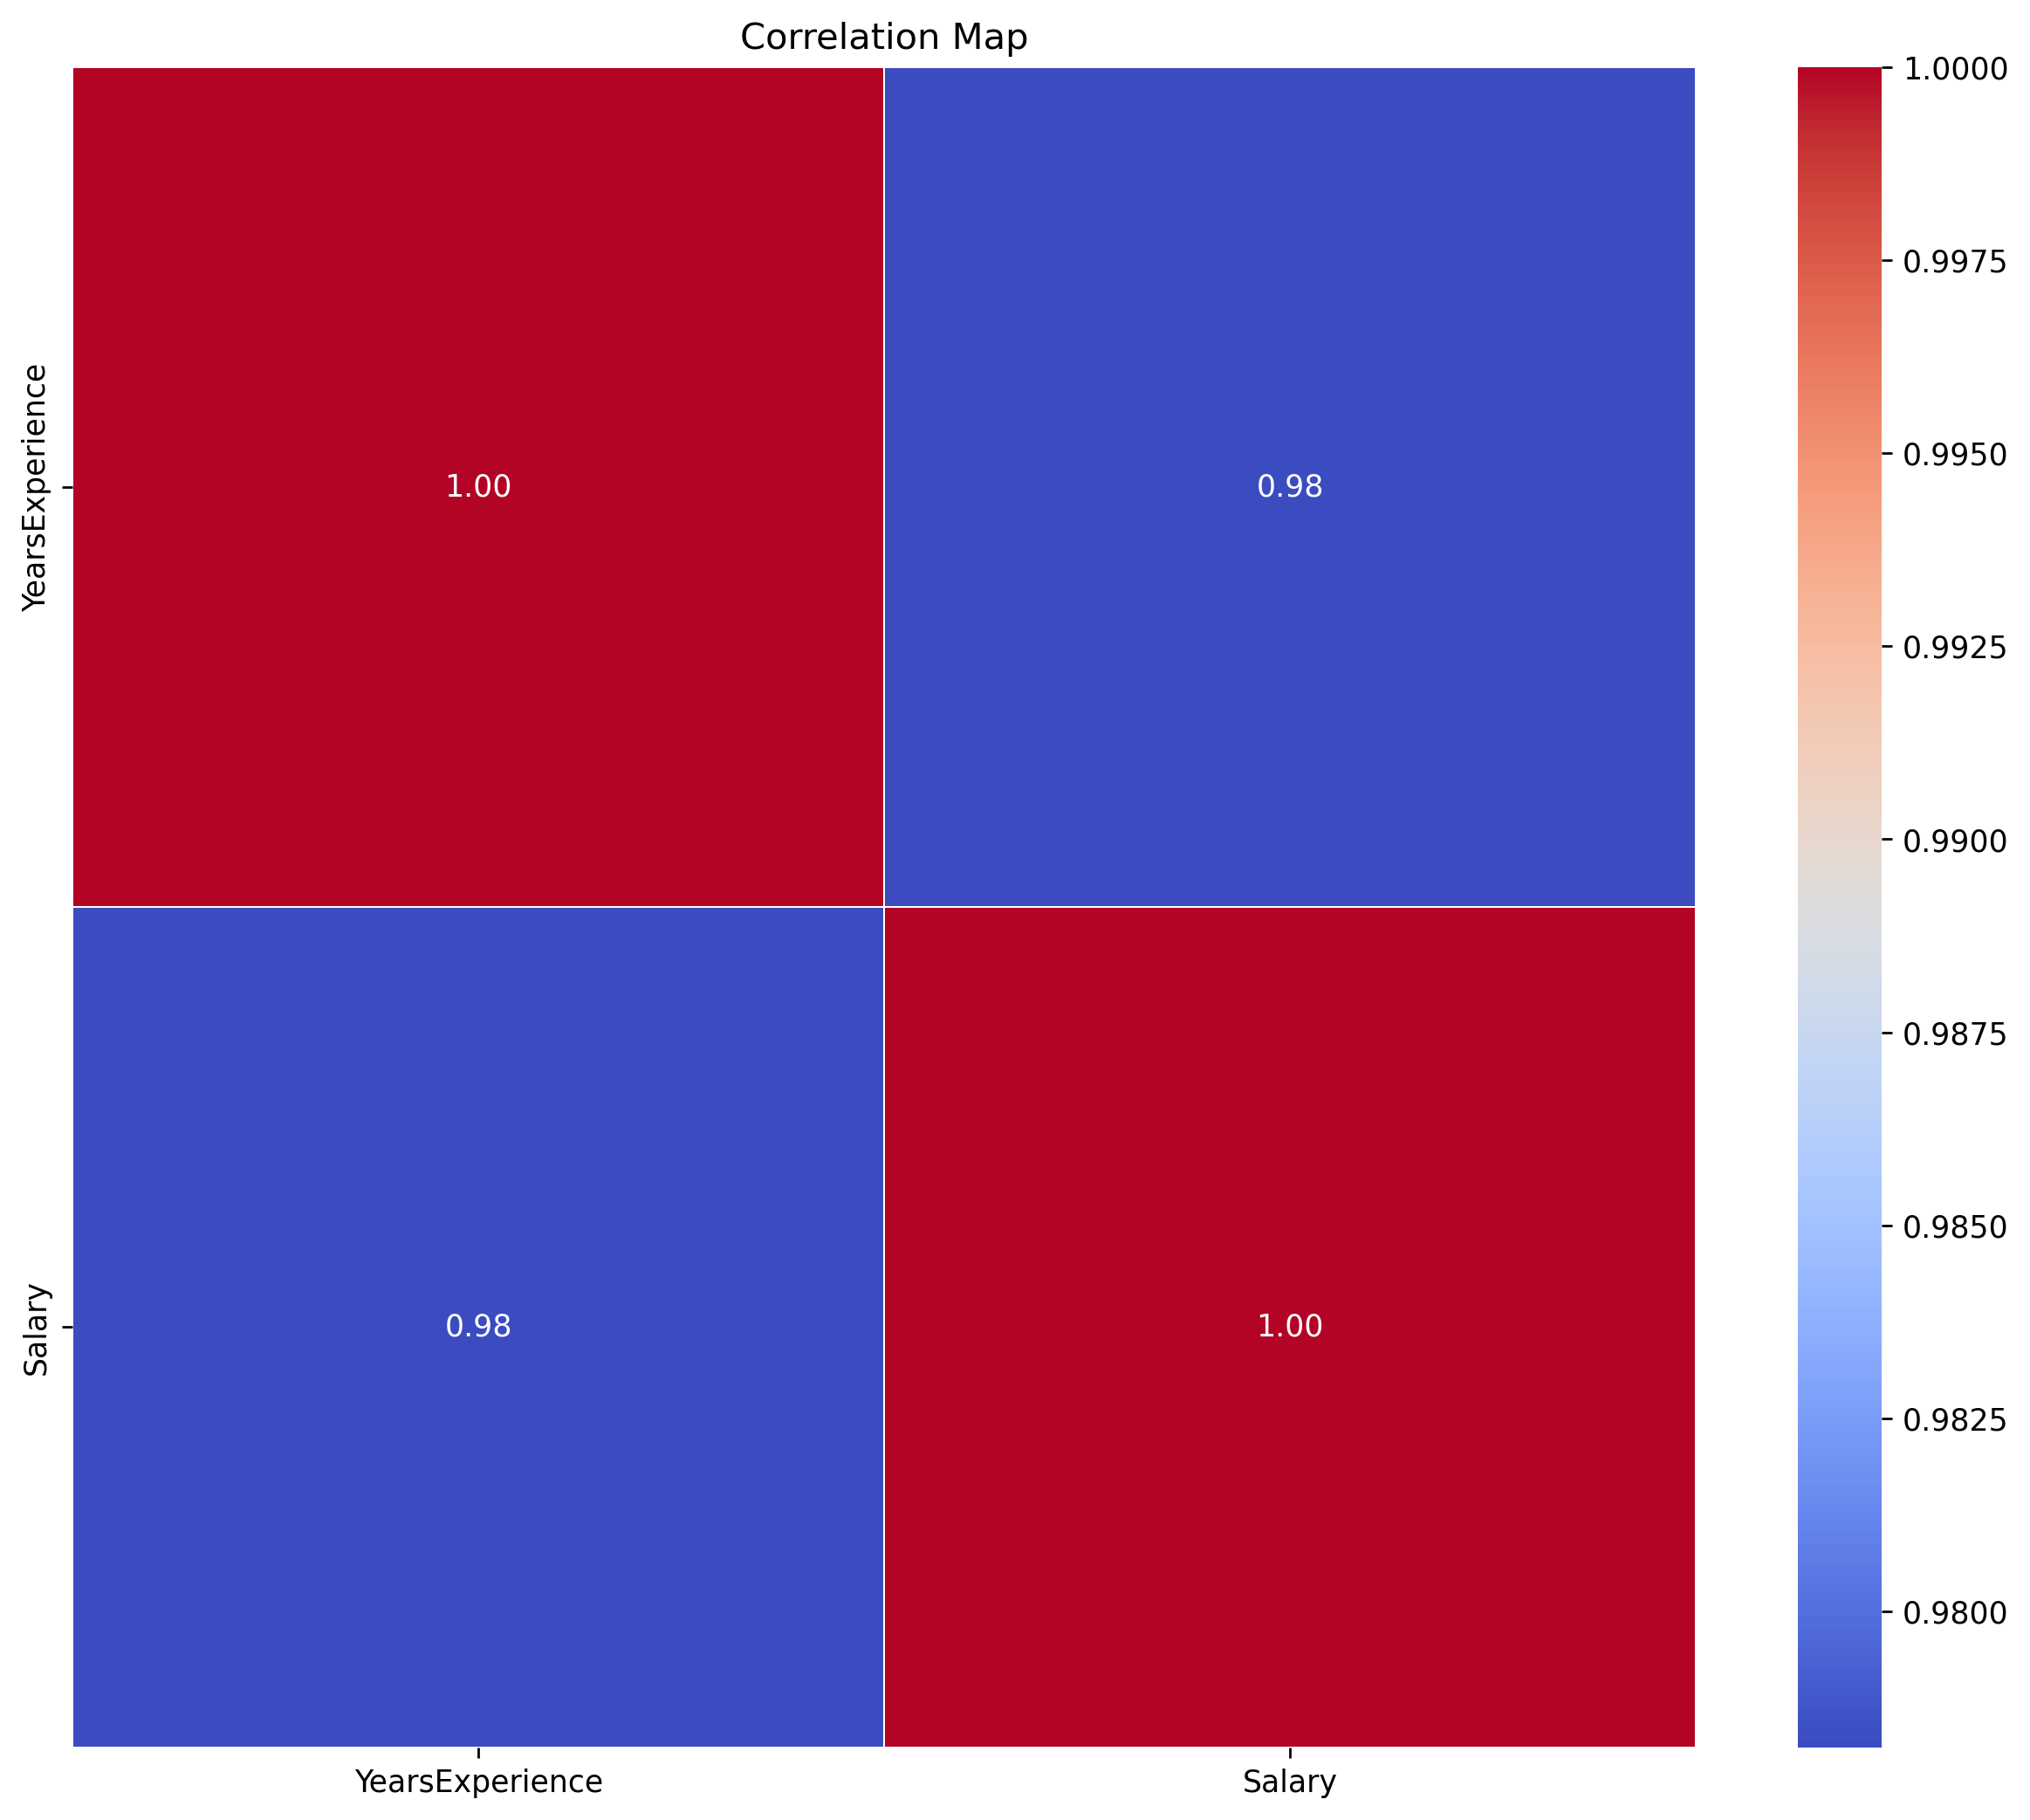

In [15]:
# Assuming df is your DataFrame containing numerical columns
s = data.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

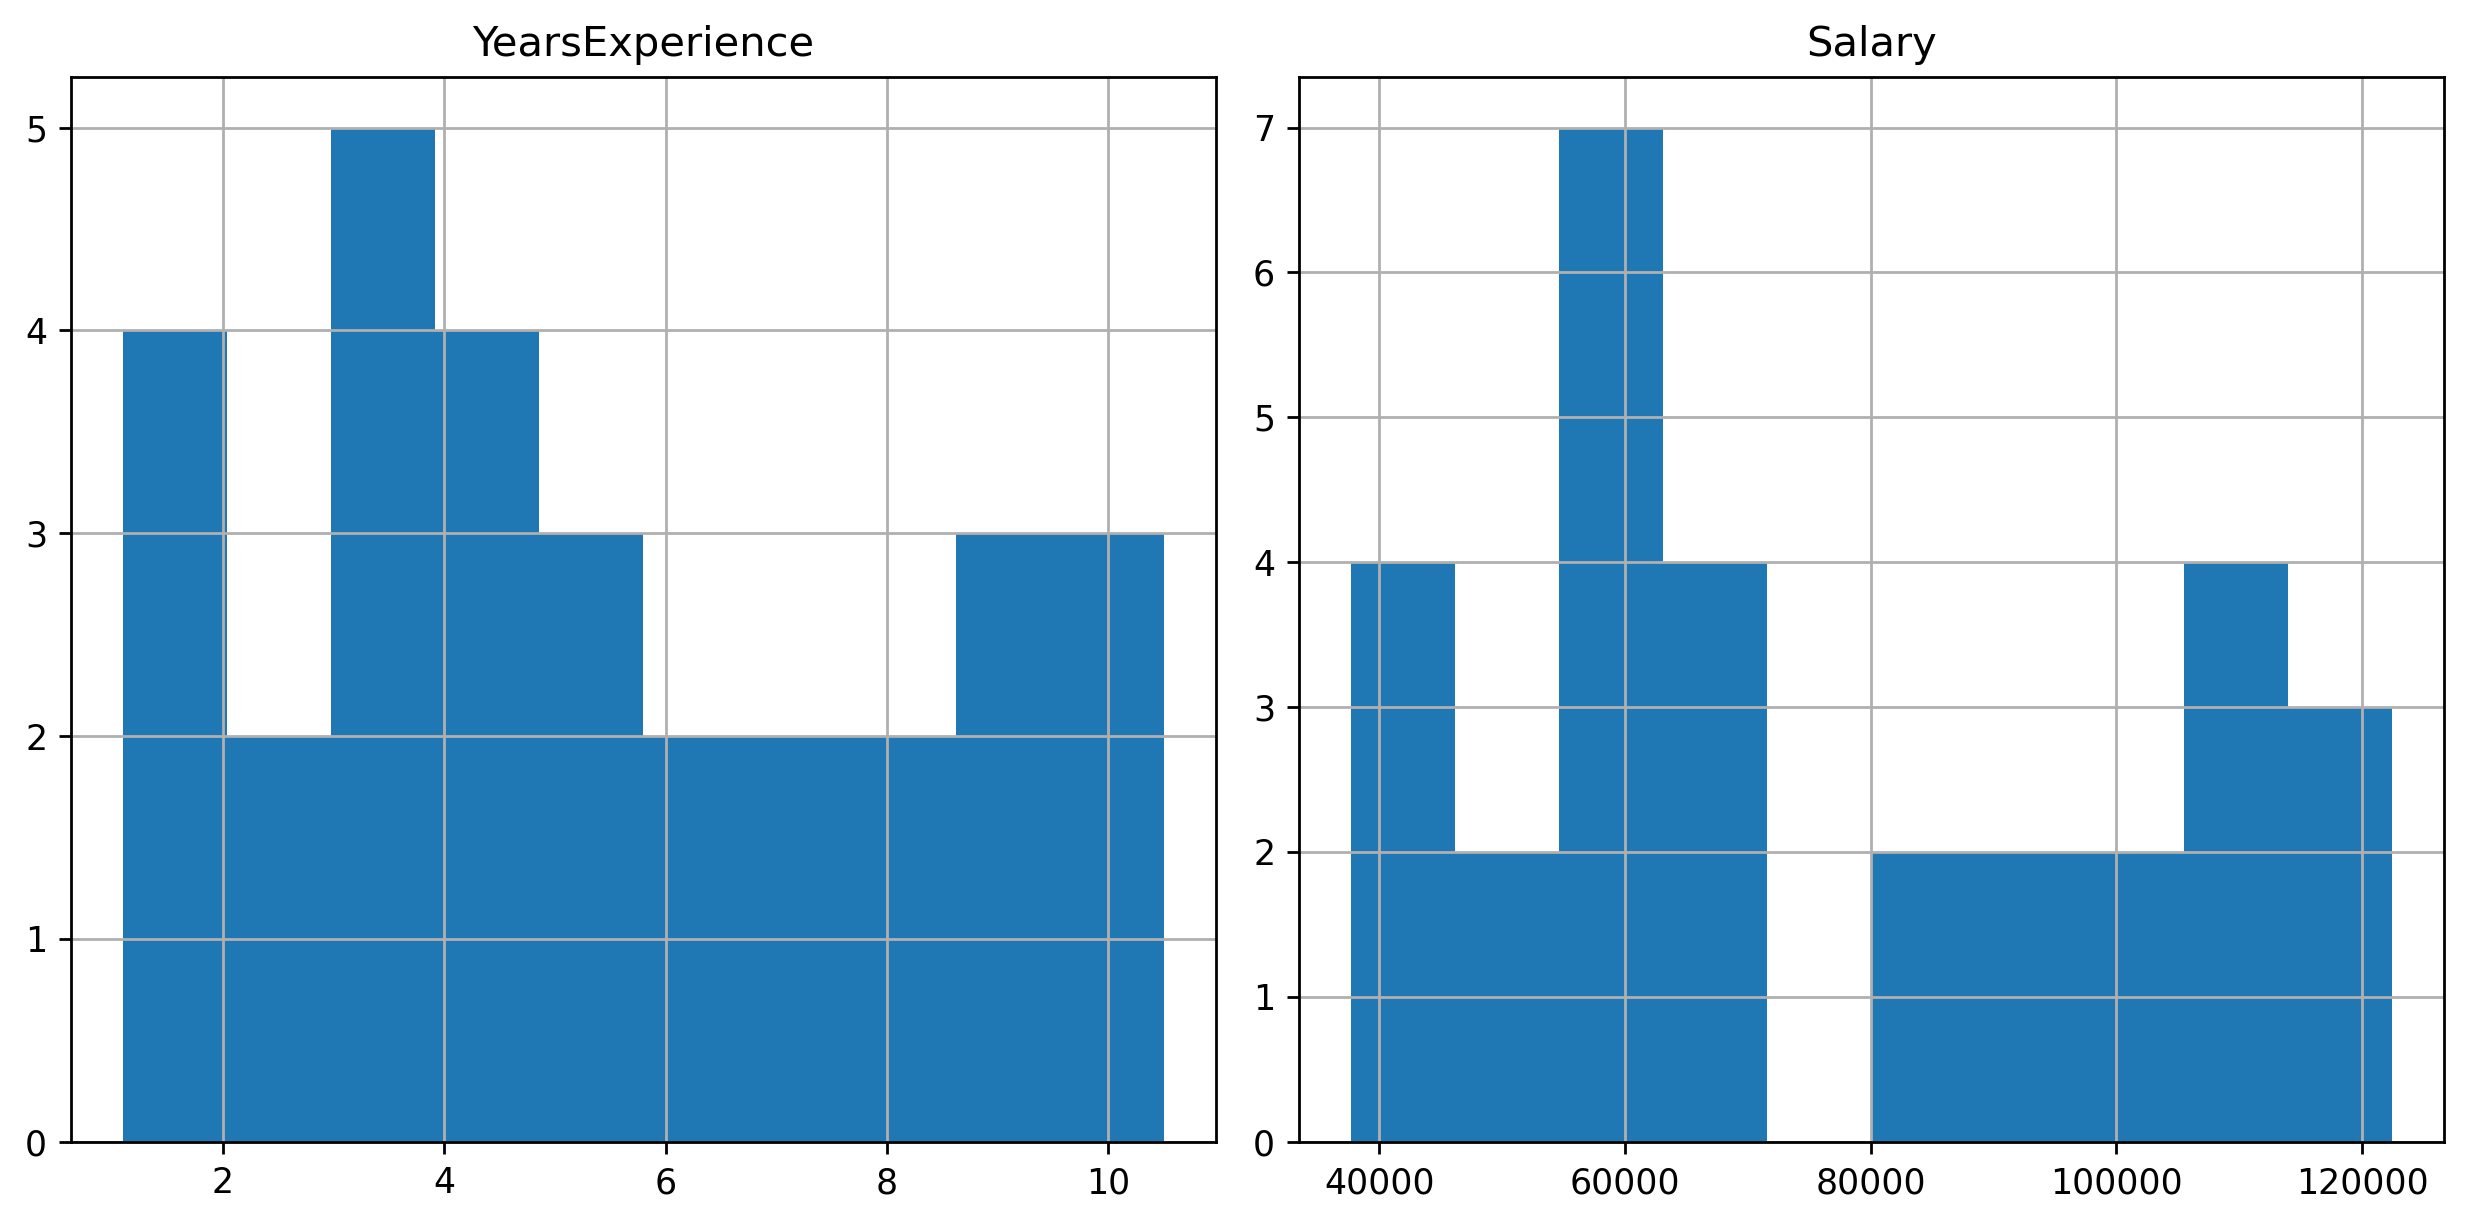

In [17]:
data.hist()
plt.tight_layout()

In [ ]:
#scatterplot to understand relatinship

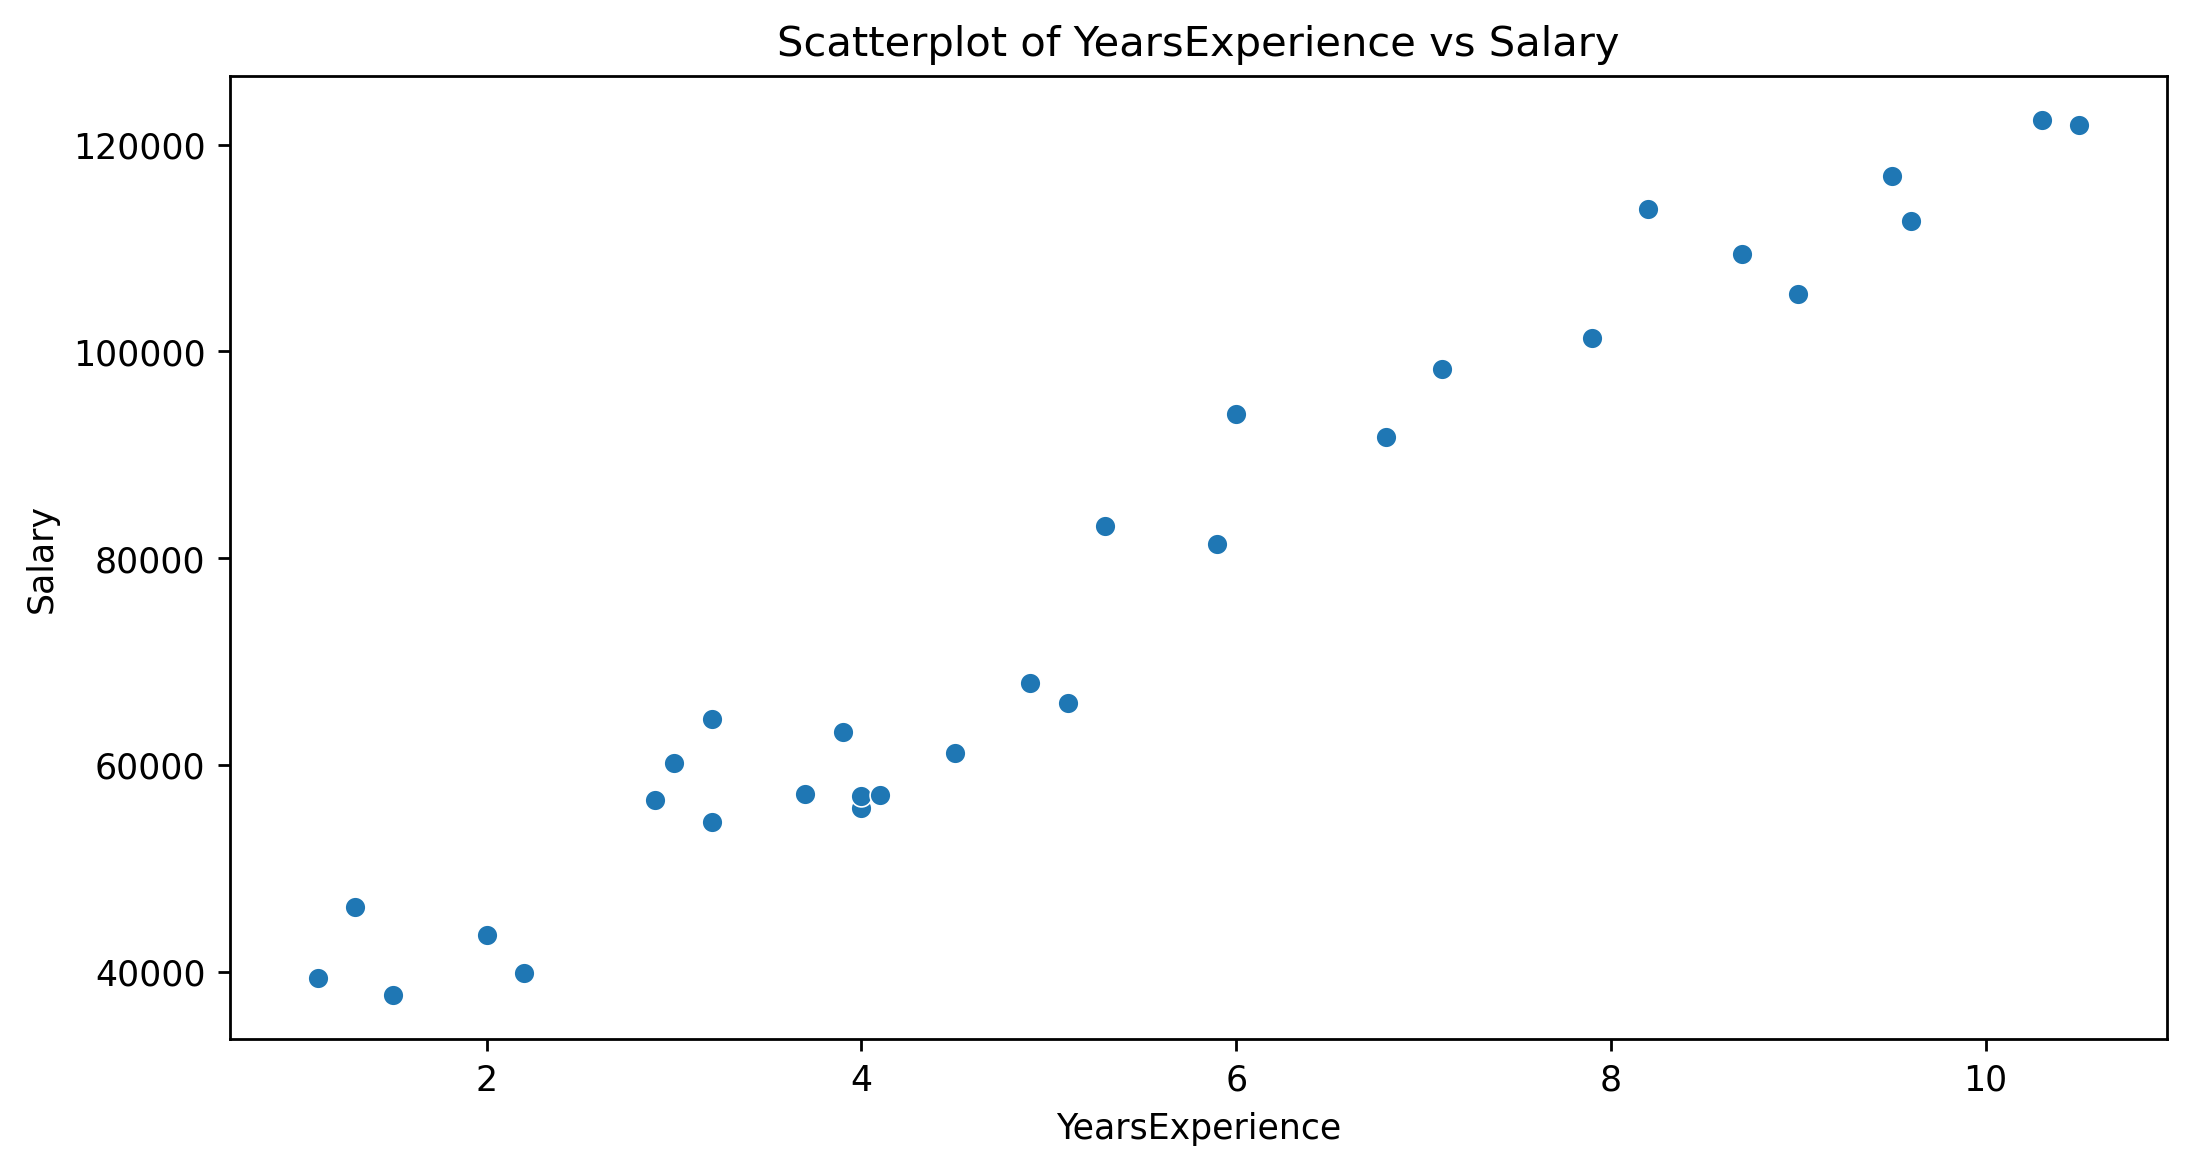

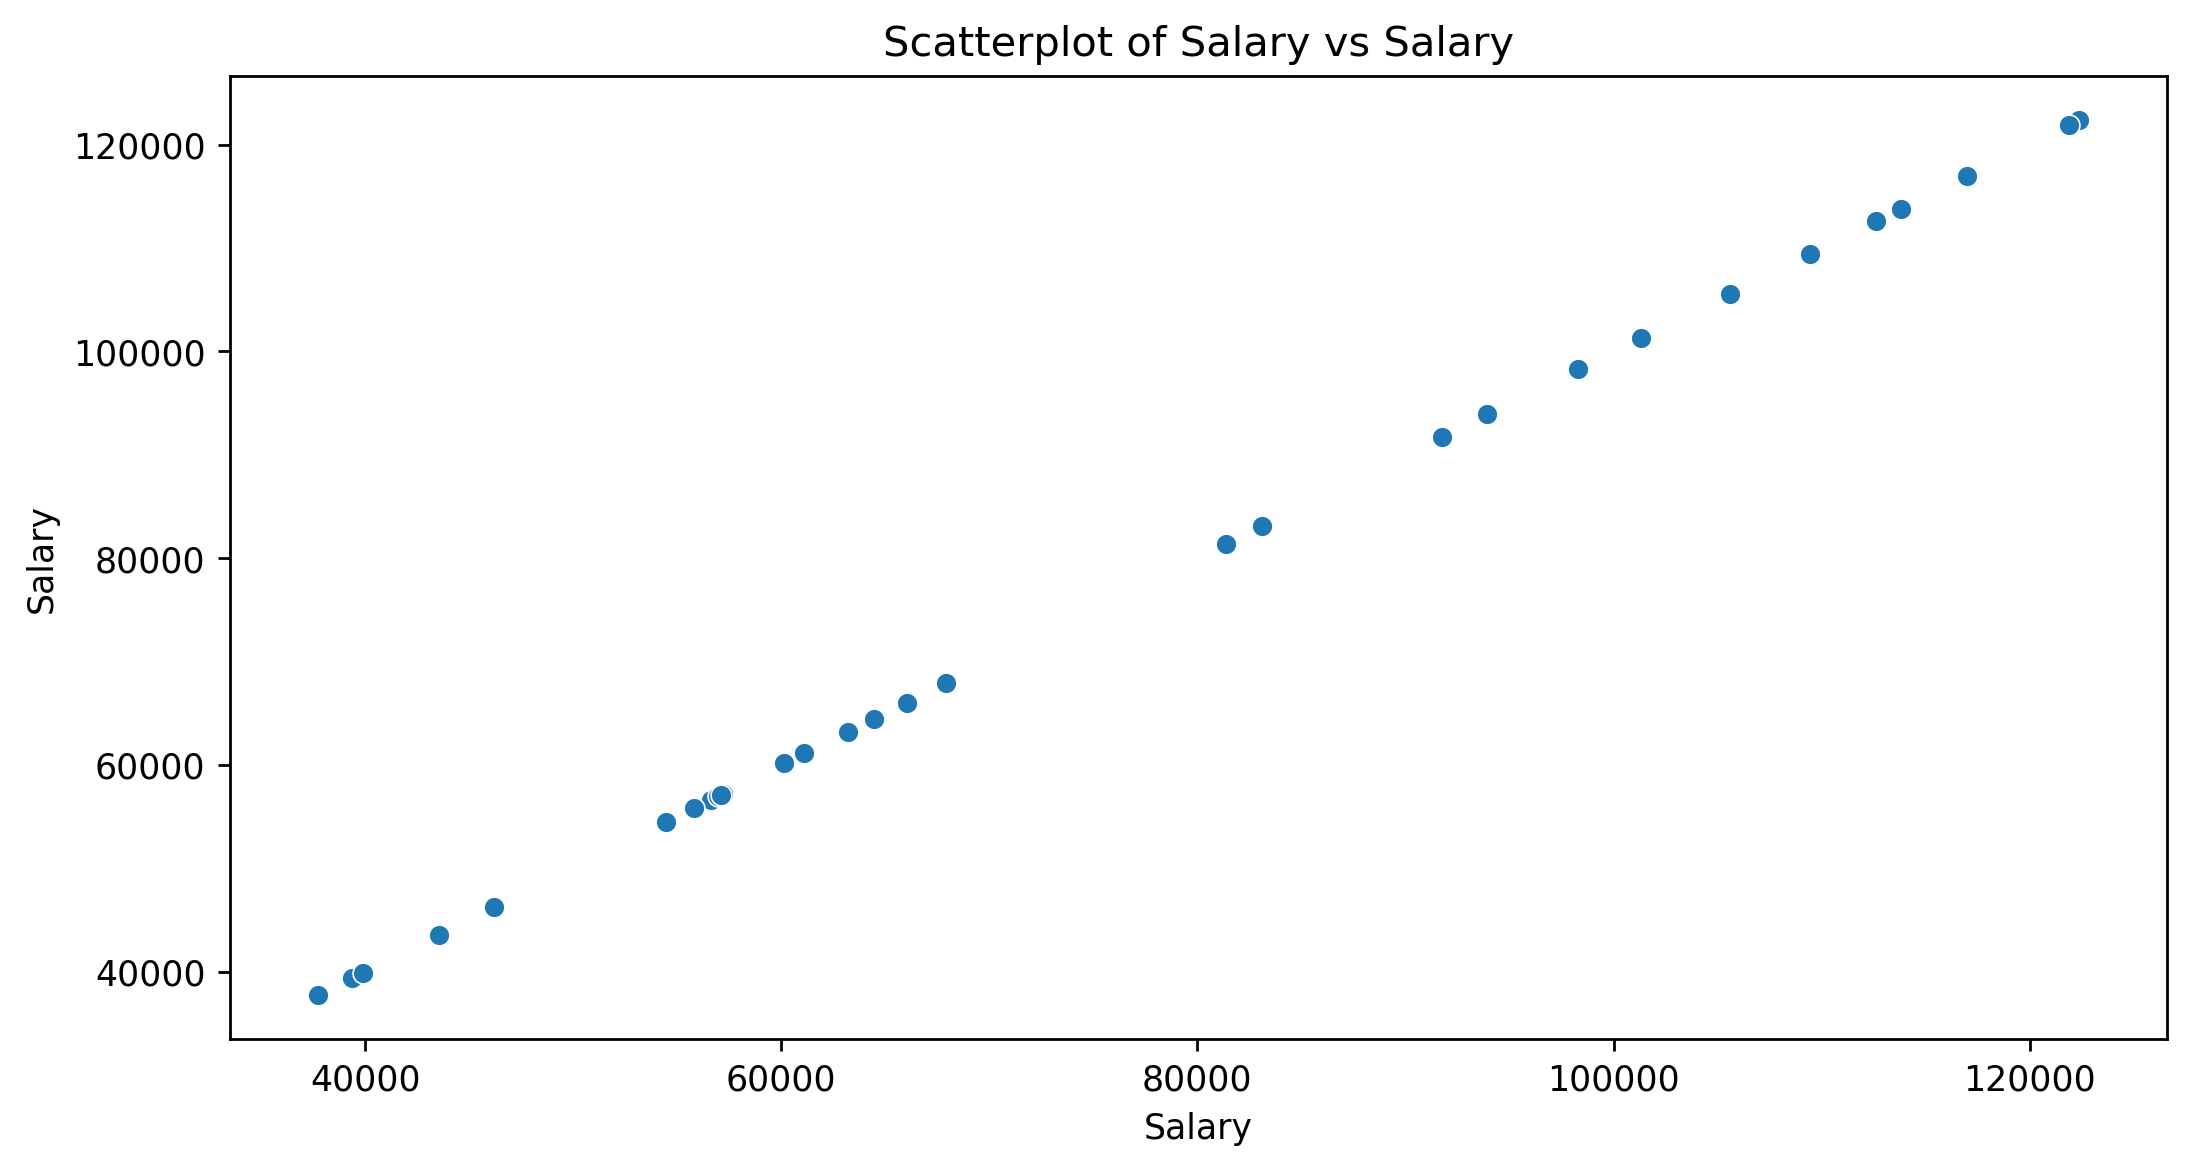

In [19]:
variables_to_plot =['YearsExperience','Salary']

# Loop through the list and create scatterplots
for i in variables_to_plot:
    sns.scatterplot(data=data, x=i, y='Salary')
    plt.title(f'Scatterplot of {i} vs Salary')
    plt.show()

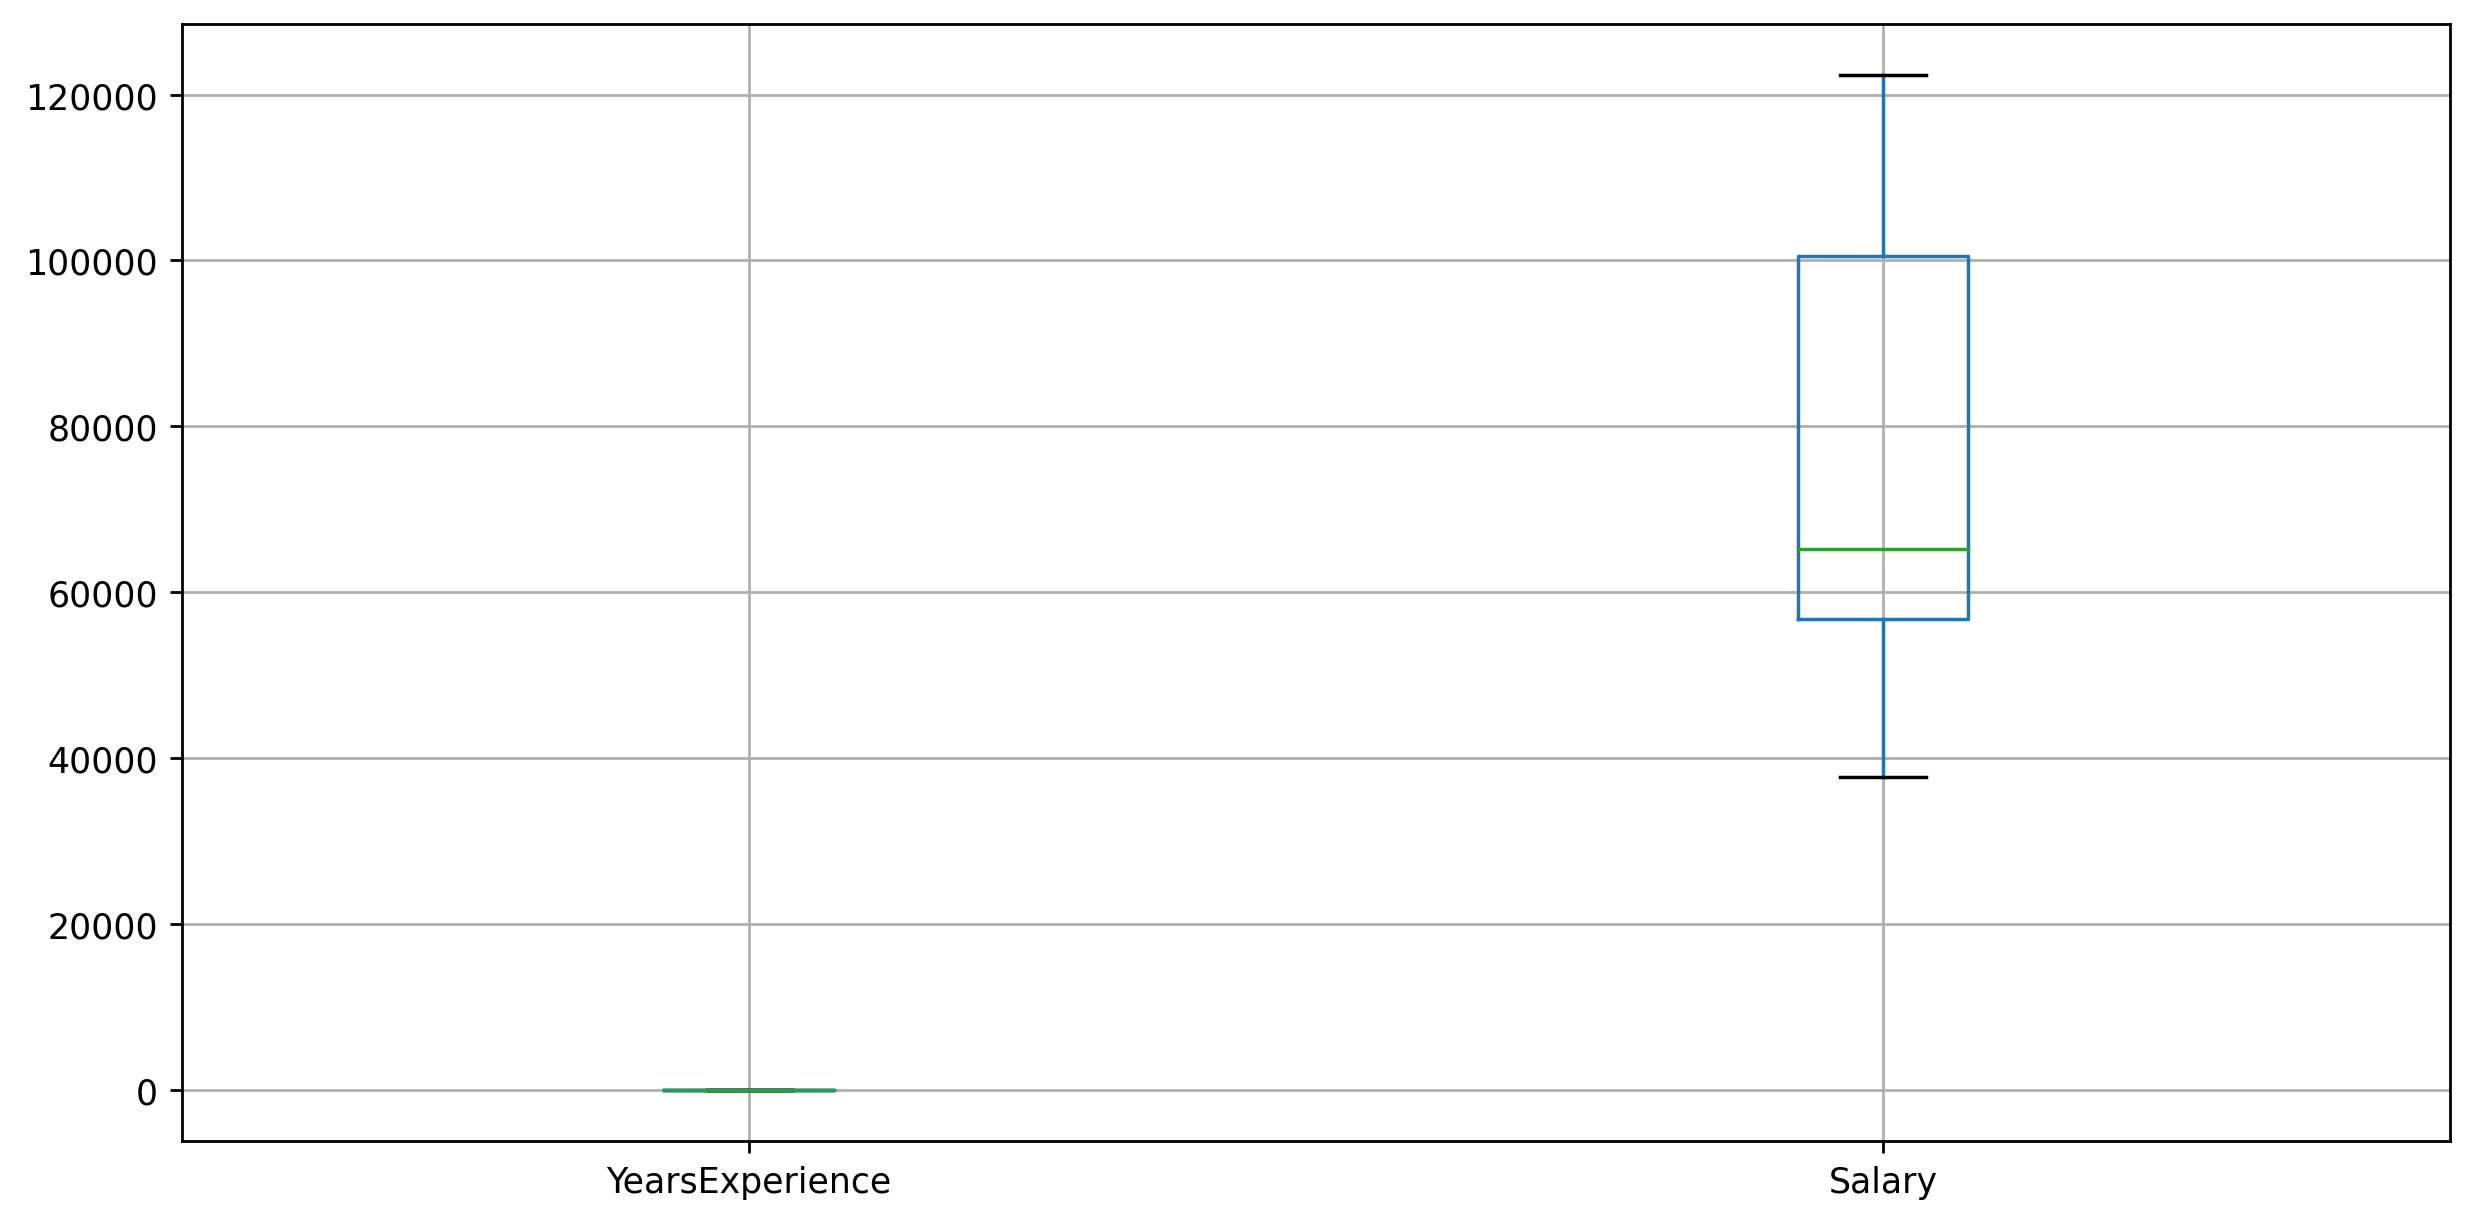

In [24]:
data.boxplot()
plt.tight_layout()

# original model

In [26]:

# Split the data into features (X) and target variable (y)
X = data[['YearsExperience']]
y = data['Salary']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create a linear regression model
model = LinearRegression()


In [29]:
# Train the model on the training set
model.fit(X_train, y_train)


LinearRegression()

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [31]:
# Calculate R-squared score
r2_score = metrics.r2_score(y_test, y_pred)

# Calculate adjusted R-squared score
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2_score) * (n - 1) / (n - p - 1)

# Calculate mean absolute error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Calculate mean squared error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)


In [32]:
# Print the results
print(f'R-squared: {r2_score}')
print(f'Adjusted R-squared: {adjusted_r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (MSE): {mse}')


R-squared: 0.9024461774180497
Adjusted R-squared: 0.878057721772562
Mean Absolute Error (MAE): 6286.453830757749
Root Mean Squared Error (RMSE): 7059.04362190151
Mean Squared Error (MSE): 49830096.85590839


# applying transformational models like log, square, sqrt

In [33]:
# Apply transformational models and evaluate their performance
transformations = ['log', 'sqrt', 'square']

for transformation in transformations:
    # Apply the transformation to the feature
    X_transformed = X.apply(lambda x: np.log1p(x) if transformation == 'log' else np.sqrt(x) if transformation == 'sqrt' else np.square(x))
    
    # Split the transformed dataset into training and testing sets
    X_train_transformed, X_test_transformed, _, _ = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    # Fit the model to the transformed training data
    model.fit(X_train_transformed, y_train)

    # Make predictions on the transformed testing data
    y_pred_transformed = model.predict(X_test_transformed)

    # Evaluate the model with transformation
    rmse_transformed = metrics.mean_squared_error(y_test, y_pred_transformed, squared=False)

    # Display the evaluation metrics for the transformed model
    print(f"\nMetrics for {transformation.capitalize()} Transformation:")
    print("Root Mean Squared Error (RMSE):", rmse_transformed)



Metrics for Log Transformation:
Root Mean Squared Error (RMSE): 7982.751235530224

Metrics for Sqrt Transformation:
Root Mean Squared Error (RMSE): 6998.9387105646

Metrics for Square Transformation:
Root Mean Squared Error (RMSE): 9672.422266258112


In [34]:
# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})

# Display the entire DataFrame
print(result_df)

    Actual      Predicted    Difference
27  112635  115790.210113  -3155.210113
15   67938   71498.278095  -3560.278095
23  113812  102596.868661  11215.131339
17   83088   75267.804224   7820.195776
8    64445   55477.792045   8967.207955
9    57189   60189.699707  -3000.699707


Text(0, 0.5, 'Predicted Values')

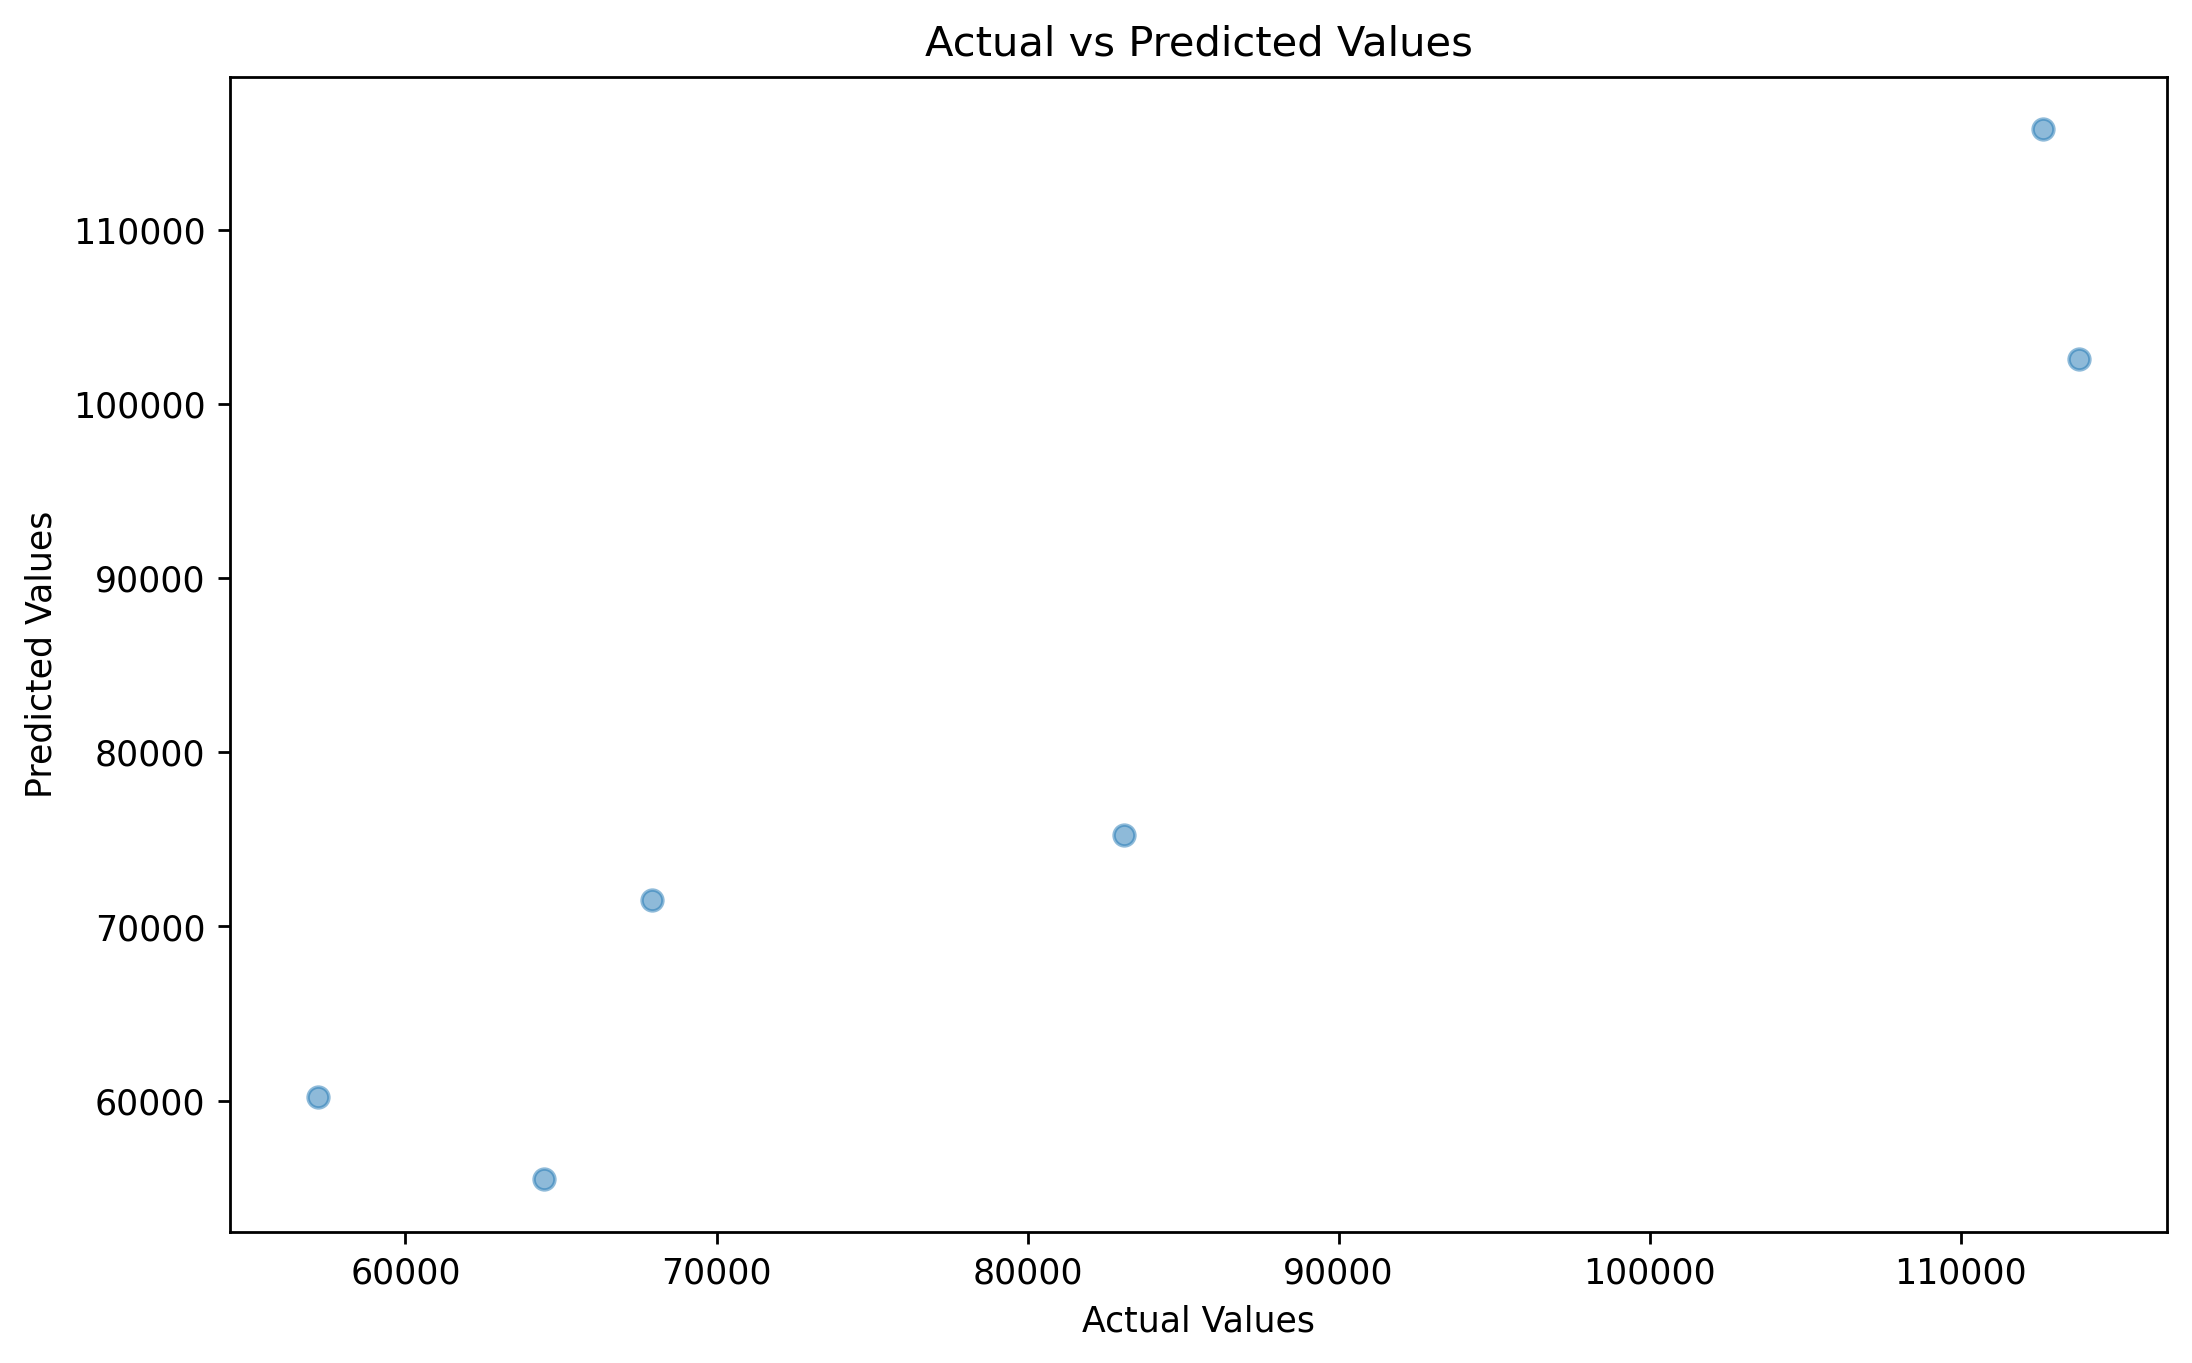

In [36]:
# Plot the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Q-Q Plot')

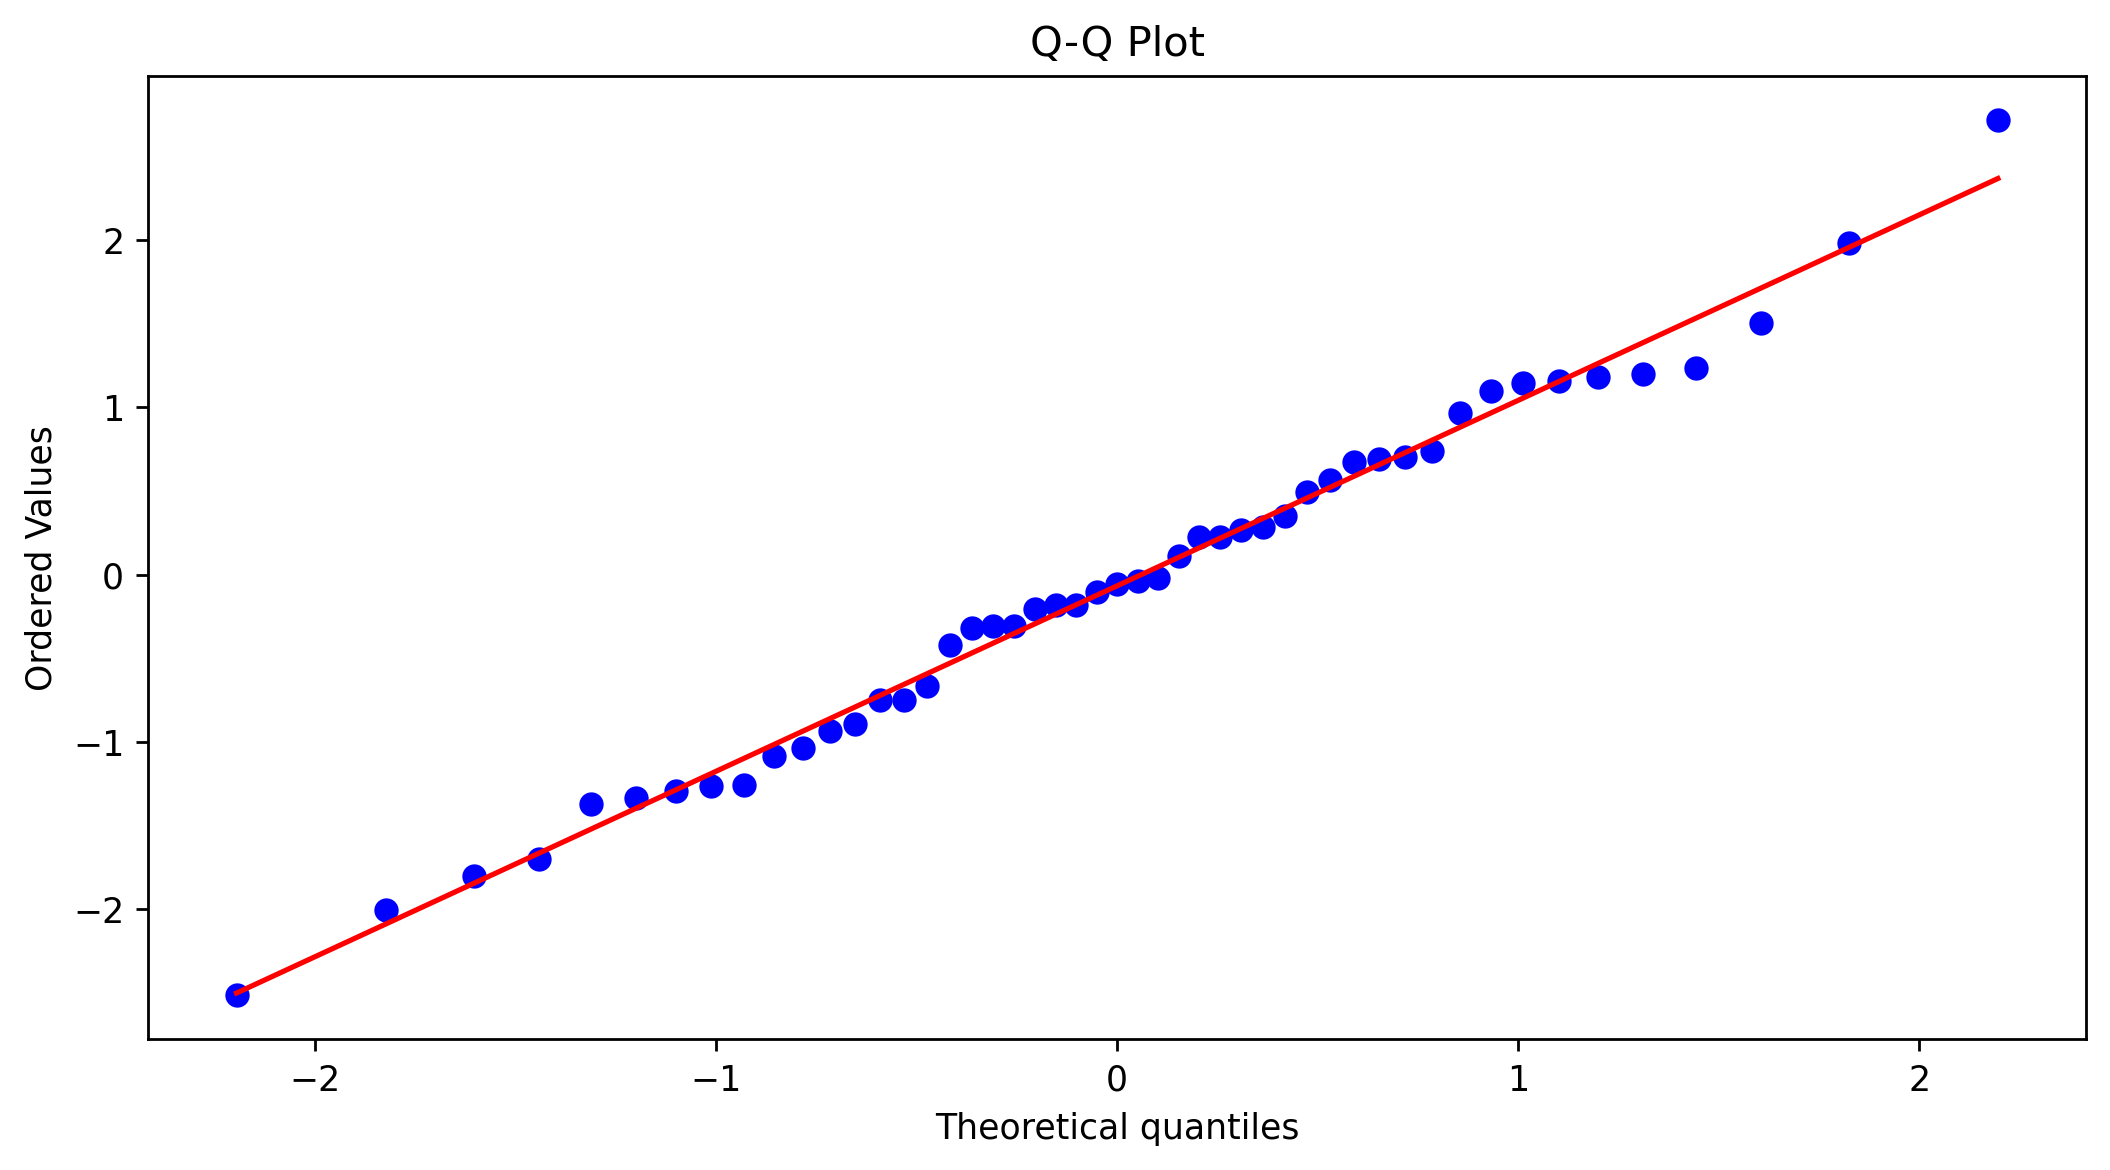

In [35]:
from scipy.stats import probplot

# Generate some random data
data = np.random.normal(size=49)

# Create a Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')